<a href="https://colab.research.google.com/github/sgajendra/Airbun_data/blob/main/Airbun_Ticketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tarfile
import urllib
import zipfile

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Extracting the Zip file from the url, i will be commeting the url part as i have already dowloaded the file.
ALL_FILES_PATH = '/content/drive/My Drive'

def fetch_and_extract(root_path=ALL_FILES_PATH):
  os.chdir('/content/drive/My Drive')
  os.makedirs('airbub',exist_ok=True)
  data_path = os.path.join(ALL_FILES_PATH,'airbub')
  print('Zipping the files')
  airbub_file = zipfile.ZipFile('airbnb-recruiting-new-user-bookings.zip')
  airbub_file.extractall(path=data_path)
  files = os.listdir(data_path)
  os.chdir('/content/drive/My Drive/airbub')
  print('list of zipped files')
  print(files)
  for file in files:
    if file.endswith('.csv.zip'):
      print('Zipping the file:',file)
      zip_file = zipfile.ZipFile(file)
      zip_file.extractall(data_path)
  airbub_file.close()
  zip_file.close()
  print('End')

fetch_and_extract()

Zipping the files
list of zipped files
['age_gender_bkts.csv.zip', 'countries.csv.zip', 'sample_submission_NDF.csv.zip', 'test_users.csv.zip', 'train_users_2.csv.zip', 'sessions.csv.zip', 'age_gender_bkts.csv', 'countries.csv', 'test_users.csv', 'sample_submission_NDF.csv', 'train_users_2.csv', 'sessions.csv', 'Airbun Ticketing.ipynb']
Zipping the file: age_gender_bkts.csv.zip
Zipping the file: countries.csv.zip
Zipping the file: sample_submission_NDF.csv.zip
Zipping the file: test_users.csv.zip
Zipping the file: train_users_2.csv.zip
Zipping the file: sessions.csv.zip
End


In [ ]:
files = os.listdir('/content/drive/My Drive/airbub')
files

['age_gender_bkts.csv.zip',
 'countries.csv.zip',
 'sample_submission_NDF.csv.zip',
 'test_users.csv.zip',
 'train_users_2.csv.zip',
 'sessions.csv.zip',
 'age_gender_bkts.csv',
 'countries.csv',
 'test_users.csv',
 'sample_submission_NDF.csv',
 'train_users_2.csv',
 'sessions.csv',
 'Airbun Ticketing.ipynb']

In [ ]:
import pandas as pd
import glob

data_path = '/content/drive/My Drive/airbub'
def load_data(root_path = data_path):
  
  os.chdir(data_path)
  csv_files = glob.glob('*.csv')

  train_data = pd.read_csv(os.path.join(data_path, "train_users_2.csv"))
  ses_data = pd.read_csv(os.path.join(data_path, "sessions.csv"))
  con_data = pd.read_csv(os.path.join(data_path, "countries.csv"))
  age_data = pd.read_csv(os.path.join(data_path, "age_gender_bkts.csv"))
  test_data = pd.read_csv(os.path.join(data_path, "test_users.csv"))
  submit_data = pd.read_csv(os.path.join(data_path, "sample_submission_NDF.csv"))
  
  return train_data,ses_data,con_data,age_data,test_data,submit_data
   

problem statement: In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

In [ ]:
train_data,ses_data,con_data,age_data,test_data,submit_data = load_data()

In [ ]:
csv_files = [train_data,ses_data,con_data,age_data,test_data,submit_data]
for csv in csv_files:
  print(csv.shape)

(213451, 16)
(10567737, 6)
(10, 7)
(420, 5)
(62096, 15)
(62096, 2)


In [ ]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
ses_data.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
con_data.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [ ]:
age_data.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [ ]:
test_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


1. The response valiable is the contory destination of new user.

In [ ]:
train_missing = train_data.isnull().sum().to_frame()
train_missing['percent'] = train_data.isnull().sum()/len(train_data)
train_missing.columns = ['count','percent']
train_missing.sort_values(by=['count','percent'],ascending = False)
train_missing

,count,percent
id,0,0.000000
date_account_created,0,0.000000
timestamp_first_active,0,0.000000
date_first_booking,124543,0.583473
gender,0,0.000000
age,87990,0.412226
signup_method,0,0.000000
signup_flow,0,0.000000
language,0,0.000000
affiliate_channel,0,0.000000


In [ ]:
test_miss = test_data.isnull().sum().to_frame()
test_miss['precent'] = test_data.isnull().sum()/len(test_data)
test_miss.columns = ['count','percent']
test_miss

,count,percent
id,0,0.000000
date_account_created,0,0.000000
timestamp_first_active,0,0.000000
date_first_booking,62096,1.000000
gender,0,0.000000
age,28876,0.465022
signup_method,0,0.000000
signup_flow,0,0.000000
language,0,0.000000
affiliate_channel,0,0.000000


In [ ]:
session_missing = ses_data.isnull().sum().to_frame()
session_missing['precent'] = ses_data.isnull().sum()/len(ses_data)
session_missing.columns = ['count','percent']
session_missing

,count,percent
user_id,34496,0.003264
action,79626,0.007535
action_type,1126204,0.106570
action_detail,1126204,0.106570
device_type,0,0.000000
secs_elapsed,136031,0.012872


In [ ]:
#target = train_data['country_destination']
#train_data = train_data.drop(columns='country_destination', axis=1)
merge_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

In [ ]:
merge_data.shape

(275547, 16)

In [ ]:
#Obtaining the ramdom sample of the data:
import random 

sample_merge = merge_data.sample(n=10000, random_state=111)

In [ ]:
sample_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp_first_active,10000.0,2.013328e+13,9.078732e+09,2.010011e+13,2.013042e+13,2.014011e+13,2.014062e+13,2.014093e+13
age,5659.0,4.815109e+01,1.508426e+02,1.600000e+01,2.800000e+01,3.300000e+01,4.200000e+01,2.014000e+03
signup_flow,10000.0,4.395100e+00,8.893993e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.500000e+01


In [ ]:
sample_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 147758 to 250248
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10000 non-null  object 
 1   date_account_created     10000 non-null  object 
 2   timestamp_first_active   10000 non-null  int64  
 3   date_first_booking       3219 non-null   object 
 4   gender                   10000 non-null  object 
 5   age                      5659 non-null   float64
 6   signup_method            10000 non-null  object 
 7   signup_flow              10000 non-null  int64  
 8   language                 10000 non-null  object 
 9   affiliate_channel        10000 non-null  object 
 10  affiliate_provider       10000 non-null  object 
 11  first_affiliate_tracked  9792 non-null   object 
 12  signup_app               10000 non-null  object 
 13  first_device_type        10000 non-null  object 
 14  first_browser   

In [ ]:
sample_merge.tail()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
245152,j8guwxo6dg,2014-08-15,20140815002707,NaN,-unknown-,NaN,basic,0,en,other,other,marketing,Web,Windows Desktop,Chrome,NaN
265308,uvyv7n9ndc,2014-09-14,20140914140753,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
210435,2squ28z1lq,2014-06-25,20140625141417,2014-06-26,-unknown-,53.0,basic,0,en,sem-brand,google,omg,Web,iPad,Mobile Safari,US
28870,d8th1ua3wh,2012-06-23,20120623164655,NaN,MALE,56.0,basic,0,en,direct,direct,product,Web,Mac Desktop,Safari,NDF
250248,gighkk8zzu,2014-08-22,20140822181124,NaN,-unknown-,27.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NaN


In [ ]:
merge_miss = sample_merge.isnull().sum().to_frame()
merge_miss['precent'] = sample_merge.isnull().sum()/len(sample_merge)
merge_miss.columns = ['count','percent']
merge_miss

,count,percent
id,0,0.0000
date_account_created,0,0.0000
timestamp_first_active,0,0.0000
date_first_booking,6781,0.6781
gender,0,0.0000
age,4341,0.4341
signup_method,0,0.0000
signup_flow,0,0.0000
language,0,0.0000
affiliate_channel,0,0.0000


In [ ]:
#clean the data:
sample_merge = sample_merge.drop(columns='date_first_booking',axis=1)


In [ ]:
#merge_data['first_affiliate_tracked'].value_counts()
#As we notice the the column date_first_booking have the missing values up to 67%, we will be dropping the columns 
#in our first iterartion of the model and we can consider the columns for feature engineer with some brain strom.

#merge_data['first_affiliate_tracked'].fillna('others',inplace=True)
#merge_data = merge_data.drop(columns='date_first_booking', axis=1)



In [ ]:
sample_merge['age'][sample_merge['age']>100]

178106     108.0
106335     105.0
21655     2014.0
11167     2014.0
265075     105.0
           ...  
127365     105.0
12031     2014.0
50917      104.0
66443      105.0
164551     105.0
Name: age, Length: 101, dtype: float64

In [ ]:
age_data.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [ ]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [ ]:
age_data['population_in_thousands'].sum()

732116.0

In [ ]:
#Lets assume the age bucket for the heigher is up to 100.
age_data['age_bucket'] = age_data['age_bucket'].replace('100+', '100-104')
age_data['mean'] = age_data['age_bucket'].apply(lambda x: (int(x.split('-')[0])+int(x.split('-')[1]))/2)
age_data = age_data.drop(columns='age_bucket',axis=1)
#since no more info on the year columns lets drop it.
age_data = age_data.drop(columns='year',axis=1)

In [ ]:
#Lets handle the age data
age_data.head()

,country_destination,gender,population_in_thousands,mean
0,AU,male,1.0,102.0
1,AU,male,9.0,97.0
2,AU,male,47.0,92.0
3,AU,male,118.0,87.0
4,AU,male,199.0,82.0


In [ ]:
age_data.isnull().sum()

country_destination        0
gender                     0
population_in_thousands    0
mean                       0
dtype: int64

Handeling the Session data

In [ ]:
ses_data.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
ses_data.shape

(10567737, 6)

In [ ]:
ses_data['id'] = ses_data['user_id']
ses_data = ses_data.drop(columns='user_id',axis=1)

In [ ]:
ses_data['action'] = ses_data['action'].replace('-unknown-', np.nan)
ses_data['action_type'] = ses_data['action_type'].replace('-unknown-', np.nan)
ses_data['action_detail'] = ses_data['action_detail'].replace('-unknown-', np.nan)

In [ ]:
ses_data['device_type'].value_counts()

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

In [ ]:
ses_data['device_type'] = ses_data['device_type'].replace('-unknown-', np.nan)

As with the action variables, we will not drop these values since this is not the dataset we will be applying our machine learning algorithms to. However, we will replace the unknown strings with NaN to give it more semantic meaning which might be useful in our analysis.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


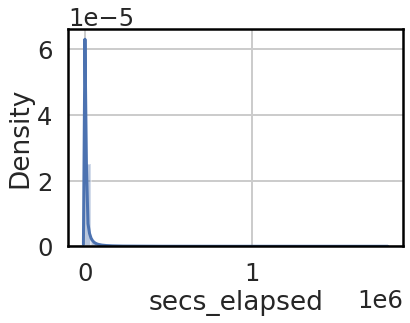

In [ ]:
sns.distplot(ses_data['secs_elapsed'])

In [ ]:
print('mean::',ses_data['secs_elapsed'].mean())
print('median:', ses_data['secs_elapsed'].median())
print('shape:',ses_data.shape)
# we can complete note the data is right skewed, indicating the huge outliers that are influencing the mean.


mean:: 19405.81075070559
median: 1147.0
shape: (10567737, 6)


There are more than 136,000 fields for which we do not know the value. We need to either drop or interpolate these values. For the time being, let us fill the unavailable values with the median of the distribution. We use median since, as was mentioned earlier, this distribution is heavily influenced by outliers.

In [ ]:
#since the data is completely right skewed, imputing with the median value will have no influence from outliers in the datsets.
median_val = ses_data['secs_elapsed'].median()
ses_data['secs_elapsed'] = ses_data['secs_elapsed'].fillna(median_val)

In [ ]:
ses_data.isnull().sum()

action             79626
action_type      2157374
action_detail    2157345
device_type       211279
secs_elapsed           0
id                 34496
dtype: int64

In [ ]:
con_data.head(15)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [ ]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
train_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [ ]:
#We notice that there are samples for which the age is much greater than 120 (the oldest person is currently 114 years old). 
#This is clearly polluted data and must be removed. Let us replace these values with NaN to 
#denote that we do not know the real age of these people.

train_data['age'] = train_data['age'].apply(lambda x: np.nan if x > 120.0 else x)

In [ ]:
train_data['gender'] = train_data['gender'].replace('-unknown-',np.nan)
train_data['first_browser'] = train_data['first_browser'].replace('-unknown-',np.nan)

In [ ]:
train_data['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

https://www.kaggle.com/rounakbanik/airbnb-new-user-bookings

# Inferential Statistics

1. let first find is there any replation between two catogorical variable, lets consider gender and target variable country_destination

In [ ]:
train_infer = train_data[(train_data['gender']!='OTHER') & (train_data['country_destination']!='NDF') & (train_data['country_destination']!='other') & (train_data['gender'].notnull())]
train_infer = train_infer[['id','gender','country_destination']]

train_infer.head()

,id,gender,country_destination
2,4ft3gnwmtx,FEMALE,US
6,lsw9q7uk0j,FEMALE,US
7,0d01nltbrs,FEMALE,US
8,a1vcnhxeij,FEMALE,US
10,yuuqmid2rp,FEMALE,US


In [ ]:
train_infer['gender'].value_counts()

FEMALE    28833
MALE      24278
Name: gender, dtype: int64

In [ ]:
train_infer['country_destination'].value_counts()

US    42151
FR     3297
IT     1790
GB     1563
ES     1530
CA      932
DE      774
NL      532
AU      395
PT      147
Name: country_destination, dtype: int64

In [ ]:
train_infer_group = train_infer.groupby(['gender','country_destination'])['id'].agg('count').reset_index().T
train_infer_group

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
gender,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,MALE,MALE,MALE,MALE,MALE,MALE,MALE,MALE
country_destination,AU,CA,DE,ES,FR,GB,IT,NL,PT,US,AU,CA,DE,ES,FR,GB,IT,NL,PT,US
id,207,455,358,853,1962,881,1091,254,78,22694,188,477,416,677,1335,682,699,278,69,19457


In [ ]:
observed = train_infer.pivot_table('id', 'gender', 'country_destination', aggfunc='count').reset_index()
observed = observed.set_index('gender')
observed

country_destination,AU,CA,DE,ES,FR,GB,IT,NL,PT,US
gender,,,,,,,,,,
FEMALE,207,455,358,853,1962,881,1091,254,78,22694
MALE,188,477,416,677,1335,682,699,278,69,19457


In [ ]:
from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(observed)
print('P value:', p)

P value: 5.830126955071572e-21


The obtain P-value is less than significant value alpha=0.05, hence we reject the null hypothesis and say there is relation between the two catagorical variable

In [ ]:
#Signup Preferences:

train_signup = train_data[(train_data['signup_method'] != 'google')][['id', 'signup_method', 'signup_app']]
train_signup['device'] = train_signup['signup_app'].apply(lambda x: 'Computer' if x == 'Web' else 'Mobile')
train_signup.head()

,id,signup_method,signup_app,device
0,gxn3p5htnn,facebook,Web,Computer
1,820tgsjxq7,facebook,Web,Computer
2,4ft3gnwmtx,basic,Web,Computer
3,bjjt8pjhuk,facebook,Web,Computer
4,87mebub9p4,basic,Web,Computer


In [ ]:
train_data['signup_app'].value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

In [ ]:
observed = train_signup.pivot_table('id', 'device','signup_method', aggfunc='count').reset_index()
observed = observed.set_index('device')
observed

signup_method,basic,facebook
device,,
Computer,131237,51480
Mobile,21660,8528


In [ ]:
from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(observed)
print('P value:', p)

P value: 0.7939984435889252


We obtain P-value is greater than significant value alpha=0.05, hence we fail to reject the null hypothesis and say there is no relation between the two catagorical variable

Conclusions
There is a relationship between gender and Airbnb Country Destination. In other words, the gender influences your country of choice.
There is no relationship between device type and signup method. The two variables are independent of each other.

# Two Tail significant Test:

In [ ]:
observed.loc['Total'] = [observed['basic'].sum(), observed['facebook'].sum()]
observed['Total'] = observed['basic'] + observed['facebook']
observed

signup_method,basic,facebook,Total
device,,,
Computer,131237,51480,182717
Mobile,21660,8528,30188
Total,152897,60008,212905


# Explanatory Analysis

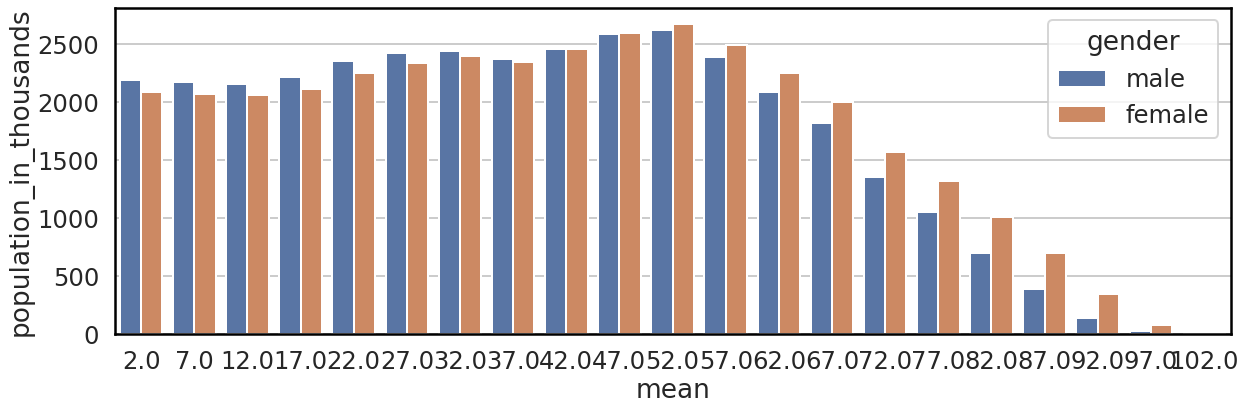

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='mean', y='population_in_thousands', hue='gender', data=age_data, ci=None)

Observation:
1. The countries that are represented in this statistic largely consist of an aging population. The large group of people are of mean ages between 47  to 57 years old.
2. The distribution resembles the skewed bell shape. Middle age people occupies the large sgare of population, closely followed by youth and finally old.
3. The mean population of youth and middle group people is faily comparable, but as we transistion towards the old (age > 57 years), the population count for every successive bucket decreases steadily.
4. One very interesting thing to note (although it may not be relevant to our analysis) is that the sex ratio is skewed towards men for younger age groups but as the mean age increases, the ratio skews more towards women. Women indeed live longer than men.

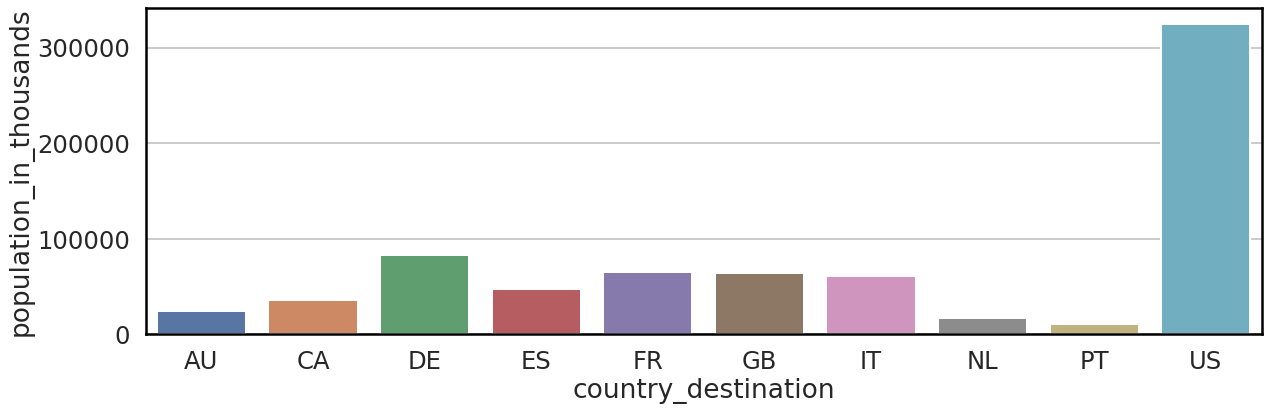

In [ ]:
plt.figure(figsize=(20,6))
pop_stats = age_data.groupby('country_destination')['population_in_thousands'].sum()
sns.barplot(x=pop_stats.index, y=pop_stats)

Observation:
1. Country US is the highly populated nation among all other destination country woth over 300million. All the other countries in the list have a population less than 100 million.


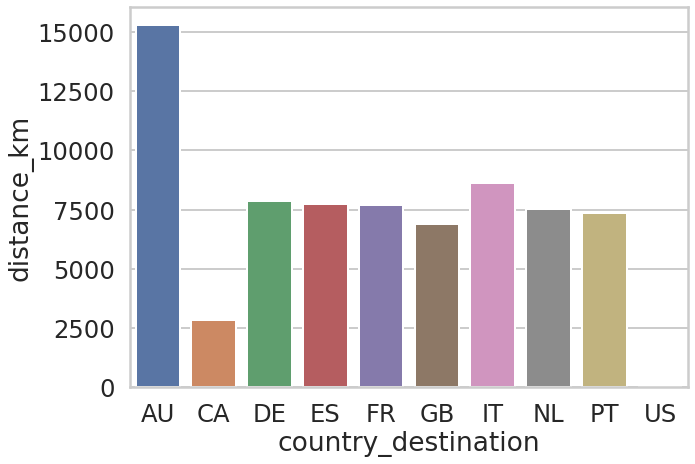

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(x='country_destination', y='distance_km', data=con_data)

In [ ]:
con_data.head(15)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


Observation:
1. The distination country CA is closest nation to origin country US, and farest country is AU with over >140million km

In [ ]:
train_country_count = train_data[(train_data['country_destination']!='NDF') & (train_data['country_destination']!='other')]['country_destination'].value_counts()
country_distance = pd.Series(con_data['distance_km'])
country_distance.index = con_data['country_destination']
country_lang = pd.Series(con_data['language_levenshtein_distance'])
country_lang.index = con_data['country_destination']
country_area = pd.Series(con_data['destination_km2'])
country_area.index = con_data['country_destination']

In [ ]:
df_dp = pd.concat([train_country_count, country_distance, country_lang, country_area], axis=1)
df_dp.columns = ['count', 'distance_km', 'language', 'area']
df_dp

,count,distance_km,language,area
US,62376,0.0000,0.00,9826675.0
FR,5023,7682.9450,92.06,643801.0
IT,2835,8636.6310,89.40,301340.0
GB,2324,6883.6590,0.00,243610.0
ES,2249,7730.7240,92.25,505370.0
CA,1428,2828.1333,0.00,9984670.0
DE,1061,7879.5680,72.61,357022.0
NL,762,7524.3203,63.22,41543.0
AU,539,15297.7440,0.00,7741220.0
PT,217,7355.2534,95.45,92090.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'sizes'
  **contour_kws,


<Figure size 720x504 with 0 Axes>

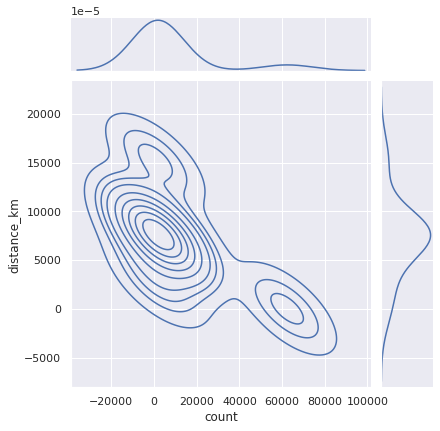

In [ ]:
sns.set(style="darkgrid", color_codes=True)
plt.figure(figsize=(10,7))
#j = sns.jointplot('count', 'distance_km', data =df_dp, kind='reg', height=8)
#j.annotate(stats.pearson)
j = sns.jointplot(x='count', y='distance_km', data=df_dp, sizes=(20,0),kind='kde')
plt.show()

import scipy.stats as stats
#g.annotate(stats.pearsonr)

There is a strong negative correlation from above representation. People overwhelmingly prefer booking in the United States than any other country in the world. We can attribute this preference to distance. Let us check if this holds true for just the interantional countries as well.

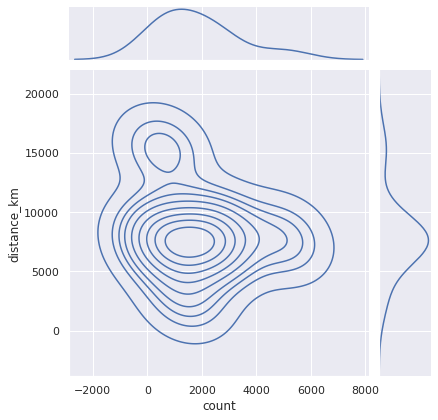

In [ ]:
sns.jointplot(x='count', y='distance_km', data=df_dp.drop('US'),kind='kde')

On droping US, correlation is smuch smaller, However, there is still a negative correlation between the two quantities.

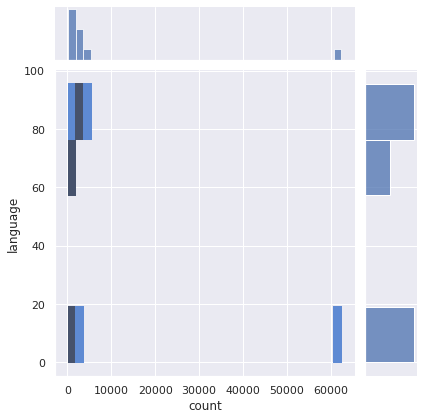

In [ ]:
sns.jointplot(x='count', y='language', data=df_dp, kind='hist')

This suggests that people indeed prefer countries that speak English.

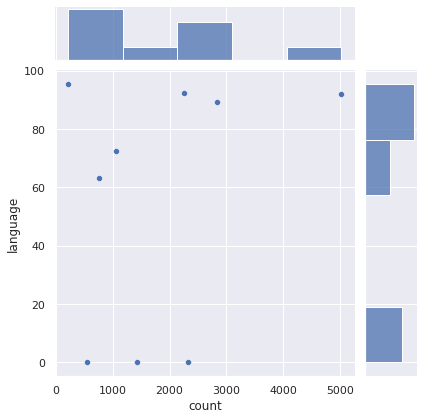

In [ ]:
sns.jointplot(x='count', y='language', data=df_dp.drop('US'), kind='scatter')

In [ ]:
##Session data

ses_data.head()

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42
2,lookup,NaN,NaN,Windows Desktop,301.0,d1mm9tcy42
3,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42
4,lookup,NaN,NaN,Windows Desktop,435.0,d1mm9tcy42


In [ ]:
ses_data.isnull().sum()

action             79626
action_type      2157374
action_detail    2157345
device_type       211279
secs_elapsed           0
id                 34496
dtype: int64

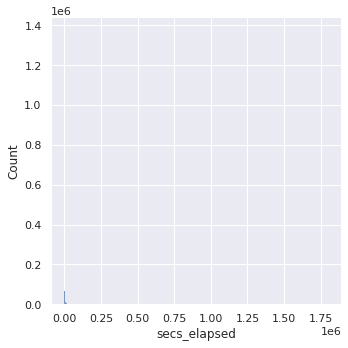

In [ ]:
sns.displot(ses_data[ses_data['secs_elapsed'].notnull()]['secs_elapsed'])

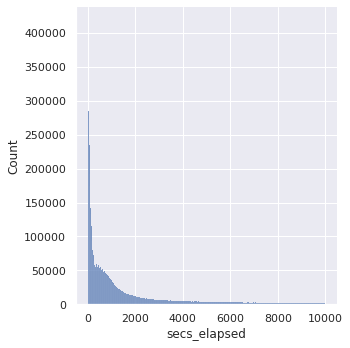

In [ ]:
sns.displot(ses_data[(ses_data['secs_elapsed'].notnull())&(ses_data['secs_elapsed'] < 10000)]['secs_elapsed'])

We can see that most the number of sessions greater than 1000 seconds decreases almost exponentially. It is fair to assume that most sessions were less than 1000 seconds long. To cross check this, let us look at its share in the total number of sessions.

In [ ]:
len(ses_data[ses_data['secs_elapsed'] < 1000])/len(ses_data[ses_data['secs_elapsed'].notnull()])

0.4672638049186879

There are 47% of session less than the 1000 sec elapse time. This strongly suggest that as the number of session increases and cross the 1000 sec,the number of instances of sessions requiring that much time exponentially decreases.

In [ ]:
#Training Users Statistics

train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


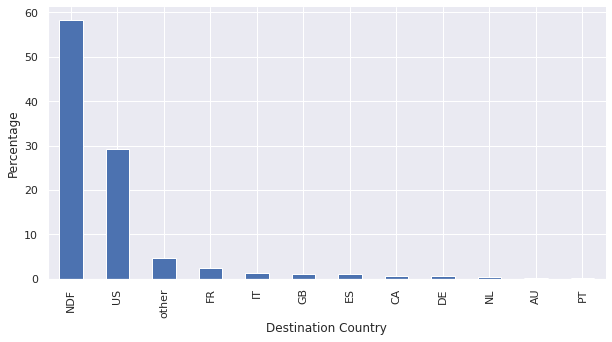

In [ ]:
plt.figure(figsize=(10,5))
country_share = train_data['country_destination'].value_counts() / train_data.shape[0] * 100
country_share.plot(kind='bar')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

1. As can be seen above, close to 60% of users have never booked an Airbnb.
2. Among the users that have, they have overwhelmingly chosen United States as their first destination. 
3. When training our machine learning model, it is of interest to us to separate the bookers from the non bookers. Subsequent classification amongst bookers would yield a high accuracy as we could use the imbalance of classes to our favor.

In [ ]:
def stacked_bar(feature):
    ctab = pd.crosstab([train_data[feature].fillna('Unknown')], train_data.country_destination, dropna=False).apply(lambda x: x/x.sum(), axis=1)
    ctab[classes].plot(kind='bar', stacked=True, colormap='terrain', legend=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


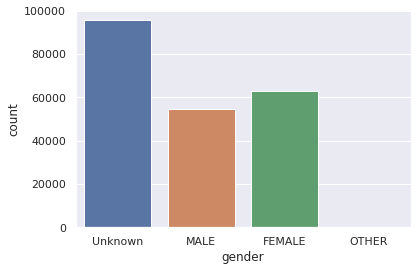

In [ ]:
sns.countplot(train_data['gender'].fillna('Unknown'))

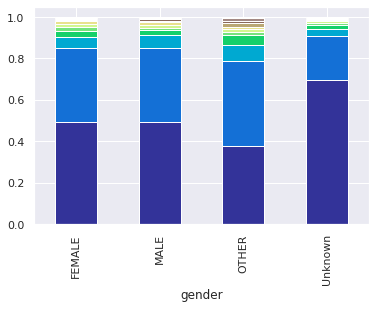

In [ ]:
classes = ['NDF','US','other','FR','IT','GB','ES','CA','DE','NL','AU','PT']

stacked_bar('gender')

One very interesting point of note is that people who haven't marked their gender are less likely to book an Airbnb. Also, people who have marked themselves as 'other' are more likely than any other group to make a booking. This might not be a very potent insight since the other group is a negligible proportion of the population.

In [ ]:
train_data['age'].isnull().sum()

88771

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


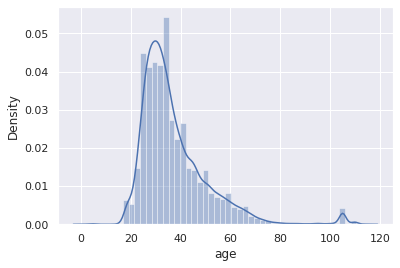

In [ ]:
sns.distplot(train_data['age'].dropna())

As we can see that people booking the Airbub ticket are more likely inclide age between 35 to 40 age, as the age decrease by booking count decreases. 

(10.0, 75.0)

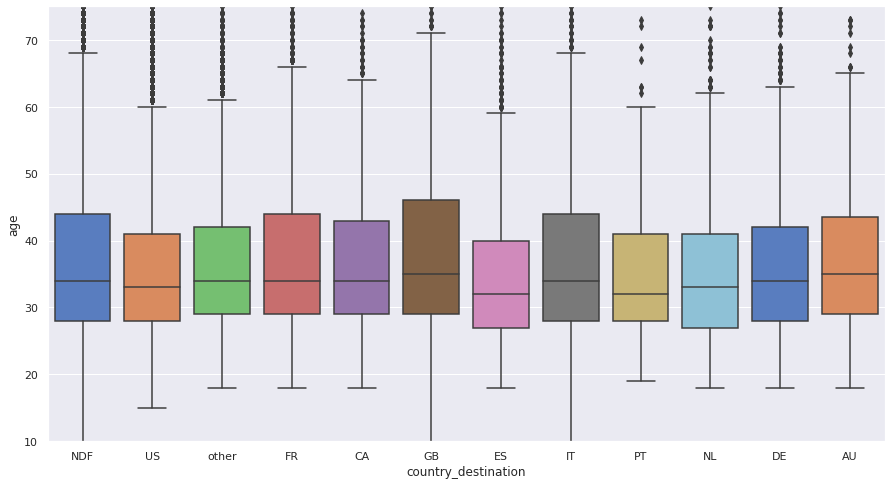

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='age', data=train_data, palette="muted", ax =ax)
ax.set_ylim([10, 75])

From the boxplot constructed, we find that the distribution is more or less the same for every country. Great Britain has the highest median age of travellers and Spain is more popular amongst younger travellers.

In [ ]:
def set_age_group(x):
    if x < 40:
        return 'Young'
    elif x >=40 and x < 60:
        return 'Middle'
    elif x >= 60 and x <= 125:
        return 'Old'
    else:
        return 'Unknown'

In [ ]:
train_data['age_group'] = train_data['age'].apply(set_age_group)

In [ ]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,Unknown
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,Young
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Middle
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Middle
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,Middle


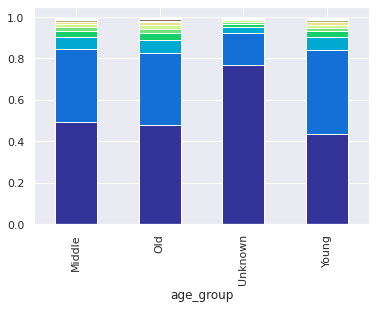

In [ ]:
stacked_bar('age_group')

We discover that people who have not disclosed their ages are least likely to book an Airbnb. Out of the users whose age we know, Middle Aged People are most likely to book an Airbnb. Although it must be noted that there isn't a very significant difference amongst the three groups.

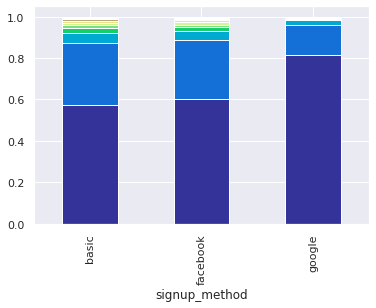

In [ ]:
stacked_bar('signup_method')

We discover that people who use basic signup method are most likely to book an Airbnb whereas people who use google are least likely to make a booking.

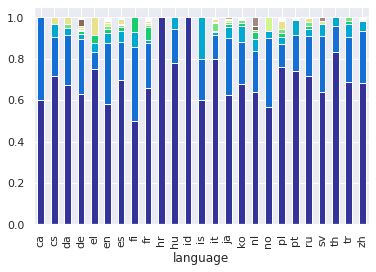

In [ ]:
stacked_bar('language')

We see that people who speak Hungarian and Indonesian made almost no bookings. People who spoke Finnish made the most bookings amongst all languages. However since the users are American, we can safely assume that the non English users consitute a minortiy.

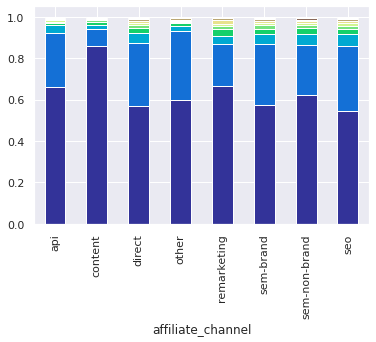

In [ ]:
stacked_bar('affiliate_channel')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


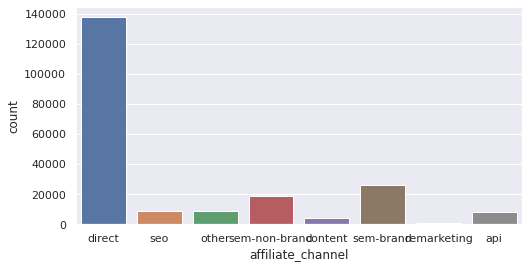

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(train_data['affiliate_channel'])

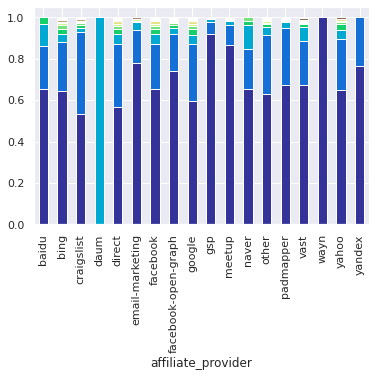

In [ ]:
stacked_bar('affiliate_provider')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


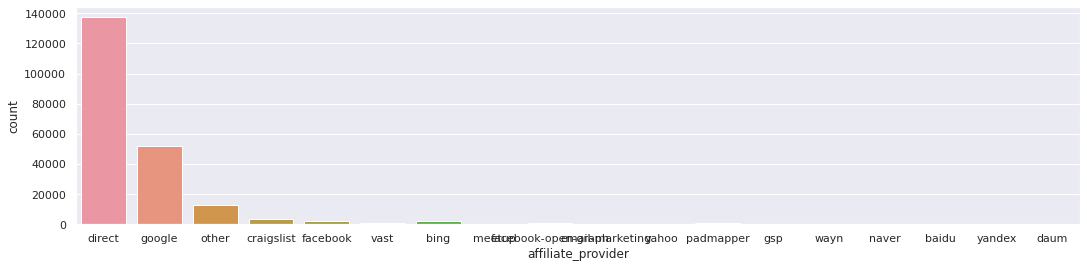

In [ ]:
plt.figure(figsize=(18,4))
sns.countplot(train_data['affiliate_provider'])

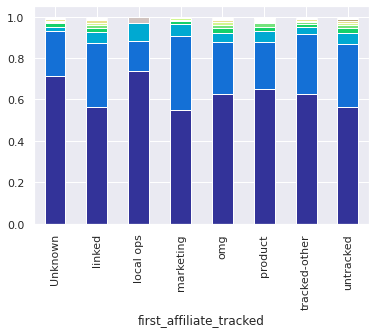

In [ ]:
stacked_bar('first_affiliate_tracked')

Some observations from the above visualisations:

The Direct Channel has the most number of conversions to bookings whereas the Content Channel has the least.
Direct and Google are the most popular affiliate providers.
Wayn has the least percentage of conversions whereas Daum has the most. However, we must take this with a pinch of salt as it might be the case that the number of sample points of these categories are extremely few in number (as the count plot suggests).
Apart from the above, Google and Craigslist have a good percentage of conversions.
People with Marketing afilliates were most likely to book. People whose first affiliate was tracked as Local Ops or was Unknown were least likely.

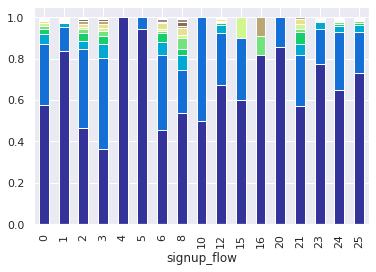

In [ ]:
stacked_bar('signup_flow')

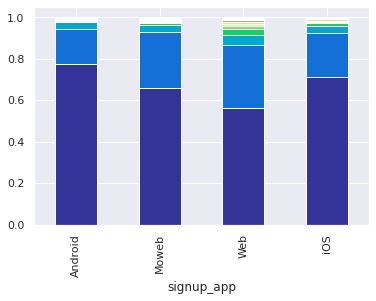

In [ ]:
stacked_bar('signup_app')

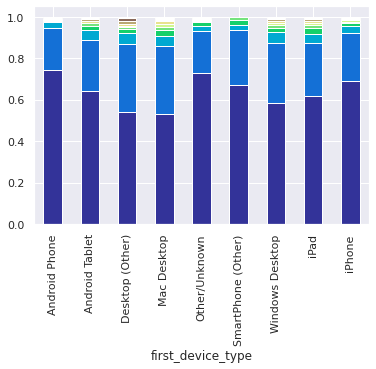

In [ ]:
stacked_bar('first_device_type')

Users using the Web App are most likely to book an Airbnb whereas Android Users are least likely to do so.
People with an Android Phone or whose devices were unknown bought fewer Airbnbs. People on Desktops (Mac or otherwise) bought more.

Let us first check the trends about when the first accounts were created.

In [ ]:
train_data['date_account_created'] = pd.to_datetime(train_data['date_account_created'])

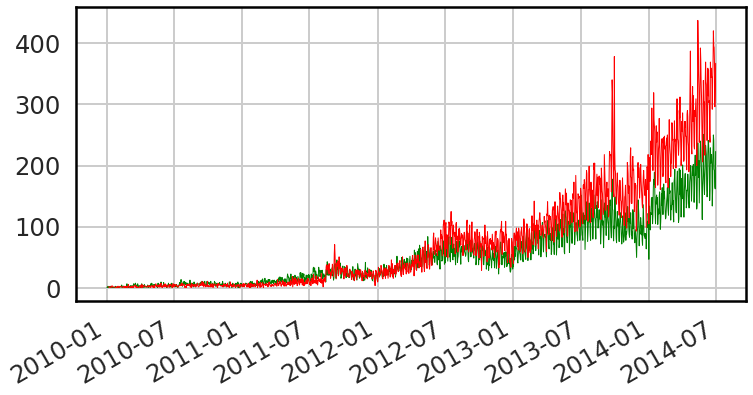

In [ ]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
plt.figure(figsize=(12,6))

train_data[train_data['country_destination'] != 'NDF']['date_account_created'].value_counts().plot(kind='line', linewidth=1, color='green')
train_data[train_data['country_destination'] == 'NDF']['date_account_created'].value_counts().plot(kind='line', linewidth=1, color='red')

The number of non booking users have increased more than the number of booking users as time passed by. This can be attributed to the fact that more people are using the platform just for exploration.

Another reason might be that since the user was on the platform for a longer time, s/he was more likely to go ahead and book a space. 

Feature Engineering

In [ ]:
ses_data.head(2)

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42


In [ ]:
total_seconds = ses_data.groupby('id')['secs_elapsed'].sum()

In [ ]:
average_seconds = ses_data.groupby('id')['secs_elapsed'].mean()

In [ ]:
total_sessions = ses_data.groupby('id')['action'].count()

In [ ]:
distinct_sessions = ses_data.groupby('id')['action'].nunique()

In [ ]:
num_short_sessions = ses_data[ses_data['secs_elapsed'] <= 300].groupby('id')['action'].count()
num_long_sessions = ses_data[ses_data['secs_elapsed'] >= 2000].groupby('id')['action'].count()

In [ ]:
num_devices = ses_data.groupby('id')['device_type'].nunique()

In [ ]:
def session_features(df):
    df['total_seconds'] = df['id'].apply(lambda x: total_seconds[x] if x in total_seconds else 0)
    df['average_seconds'] = df['id'].apply(lambda x: average_seconds[x] if x in average_seconds else 0)
    df['total_sessions'] = df['id'].apply(lambda x: total_sessions[x] if x in total_sessions else 0)
    df['distinct_sessions'] = df['id'].apply(lambda x: distinct_sessions[x] if x in distinct_sessions else 0)
    df['num_short_sessions'] = df['id'].apply(lambda x: num_short_sessions[x] if x in num_short_sessions else 0)
    df['num_long_sessions'] = df['id'].apply(lambda x: num_long_sessions[x] if x in num_long_sessions else 0)
    df['num_devices'] = df['id'].apply(lambda x: num_devices[x] if x in num_devices else 0)
    return df

In [ ]:
train_data['first_browser'].value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
RockMelt                   24
SiteKiosk                  24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
CometBird                  11
SeaMonkey                  11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
OmniWeb                     2
Opera Mobi

In [ ]:
def browsers(df):
    major_browsers = ['Chrome', 'Safari', 'Firefox', 'IE', 'Mobile Safari']
    df['first_browser'] = df['first_browser'].apply(lambda x: 'Other' if x not in major_browsers else x)
    return df

In [ ]:
train_data['first_device_type'].value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [ ]:
def classify_device(x):
    if x.find('Desktop') != -1:
        return 'Desktop'
    elif x.find('Tablet') != -1 or x.find('iPad') != -1:
        return 'Tablet'
    elif x.find('Phone') != -1:
        return 'Phone'
    else:
        return 'Unknown'

In [ ]:
def devices(df):
    df['first_device_type'] = df['first_device_type'].apply(classify_device)
    return df

In [ ]:
def affiliate_tracked(df):
    df['first_affiliate_tracked'] = df['first_affiliate_tracked'].fillna('Unknown')
    df['first_affiliate_tracked'] = df['first_affiliate_tracked'].apply(lambda x: 'Other' if x != 'Unknown' and x != 'untracked' else x)
    return df

def affiliate_provider(df):
    df['affiliate_provider'] = df['affiliate_provider'].apply(lambda x: 'rest' if x not in ['direct', 'google', 'other'] else x)
    return df

def affiliate_channel(df):
    df['affiliate_channel'] = df['affiliate_channel'].apply(lambda x: 'other' if x  not in ['direct', 'content'] else x)
    return df


In [ ]:
def languages(df):
    df['language'] = df['language'].apply(lambda x: 'foreign' if x != 'en' else x)
    return df

In [ ]:
def first_booking(df):
    df = df.drop('date_first_booking', axis=1)
    return df

In [ ]:
def account_created(df):
    df = df.drop('date_account_created', axis=1)
    return df

In [ ]:
def feature_engineering(df):
    df = session_features(df)
    df = df.drop('age', axis=1)
    df = browsers(df)
    df =devices(df)
    df =affiliate_tracked(df)
    df = affiliate_provider(df)
    df = affiliate_channel(df)
    df = languages(df)
    df['is_3'] = df['signup_flow'].apply(lambda x: 1 if x==3 else 0)
    df = first_booking(df)
    df = df.drop('timestamp_first_active', axis=1)
    df = account_created(df)
    df = df.set_index('id')
    #df = pd.get_dummies(df, prefix='is')
    return df

In [ ]:
train_data = session_features(train_data)

In [ ]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,total_seconds,average_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,num_devices
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,Unknown,0.0,0.0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,Young,0.0,0.0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Middle,0.0,0.0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Middle,0.0,0.0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,Middle,0.0,0.0,0,0,0,0,0


In [ ]:
#train_data = train_data.drop('age', axis=1)
#train_data = browsers(train_data)
#train_data = devices(train_data)
#train_data = affiliate_tracked(train_data)
#train_data = affiliate_provider(train_data)
#train_data = affiliate_channel(train_data)

In [ ]:
train_data = feature_engineering(train_data)

In [ ]:
train_data.head()

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,total_seconds,average_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,num_devices,is_3
id,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,NaN,facebook,0,en,direct,direct,untracked,Web,Desktop,Chrome,NDF,Unknown,0.0,0.0,0,0,0,0,0,0
820tgsjxq7,MALE,facebook,0,en,other,google,untracked,Web,Desktop,Chrome,NDF,Young,0.0,0.0,0,0,0,0,0,0
4ft3gnwmtx,FEMALE,basic,3,en,direct,direct,untracked,Web,Desktop,IE,US,Middle,0.0,0.0,0,0,0,0,0,1
bjjt8pjhuk,FEMALE,facebook,0,en,direct,direct,untracked,Web,Desktop,Firefox,other,Middle,0.0,0.0,0,0,0,0,0,0
87mebub9p4,NaN,basic,0,en,direct,direct,untracked,Web,Desktop,Chrome,US,Middle,0.0,0.0,0,0,0,0,0,0


In [ ]:
class_dict = {
    'NDF': 0,
    'US': 1,
    'other': 2,
    'FR': 3,
    'CA': 4,
    'GB': 5,
    'ES': 6,
    'IT': 7,
    'PT': 8,
    'NL': 9,
    'DE': 10,
    'AU': 11
}



In [ ]:
X, y = train_data.drop('country_destination', axis=1), train_data['country_destination'].apply(lambda x: class_dict[x])

In [ ]:
X = pd.get_dummies(X, prefix='is')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, stratify=y)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)


(160088, 45)
(53363, 45)
(160088,)
(53363,)


#Model Building

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(train_X)
#scaler.fit()

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
model = LogisticRegression(solver = 'saga',max_iter = 1000)
model.fit(train_X, train_y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# use the model to make predictions with the test data
y_pred = model.predict(test_X)

In [ ]:
# how did our model perform?
count_misclassified = (test_y != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(test_y, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 19601
Accuracy: 0.63


In [ ]:
a = np.random.randn(3, 3)
b = np.random.randn(3, 1)
c = a*b

In [ ]:
c.shape

(3, 3)